### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-22/11/19
#### Clasificacion de RWE-DWT de MI-EEG con LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 3, 22))
x_test = x_test.reshape((n_samples_test, 3, 22))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 71us/sample - loss: 2.6299 - acc: 0.4931
kappa:  0.32407407407407407
confusion matrix:
 [[39 15 11  7]
 [21 38 12  1]
 [ 9  3 29 31]
 [14  3 19 36]]
(0.5005995047269527, 0.4930555555555556, 0.4946922005422727, None)


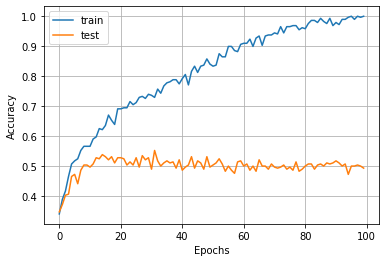

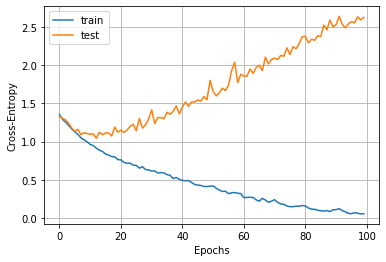

Iteration: 2
288/288 [==============================] - 0s 73us/sample - loss: 2.8088 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[34 22  9  7]
 [19 42 10  1]
 [17  3 29 23]
 [14  2 16 40]]
(0.5074907096564897, 0.5034722222222223, 0.5043883161060884, None)


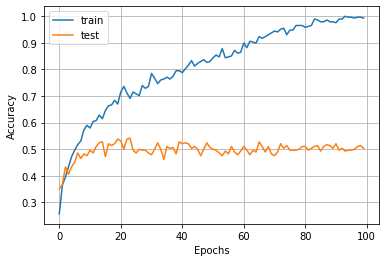

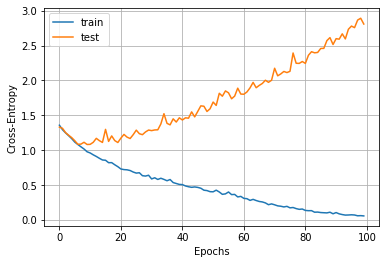

Iteration: 3
288/288 [==============================] - 0s 72us/sample - loss: 2.6580 - acc: 0.4826
kappa:  0.31018518518518523
confusion matrix:
 [[39 16 10  7]
 [24 36  9  3]
 [18  1 29 24]
 [17  3 17 35]]
(0.49855413737401316, 0.48263888888888884, 0.4852837735886404, None)


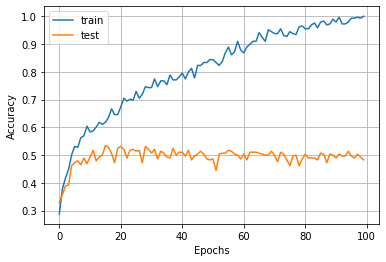

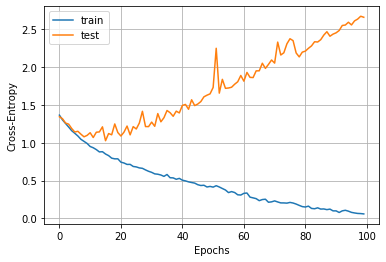

Iteration: 4
288/288 [==============================] - 0s 87us/sample - loss: 2.7165 - acc: 0.4965
kappa:  0.3287037037037037
confusion matrix:
 [[42 18  7  5]
 [24 41  6  1]
 [19  2 24 27]
 [18  1 17 36]]
(0.5088102219377836, 0.49652777777777773, 0.495882744333046, None)


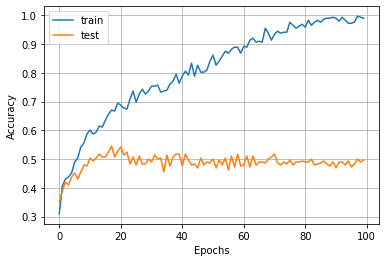

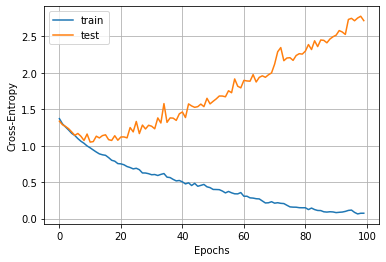

Iteration: 5
288/288 [==============================] - 0s 71us/sample - loss: 2.7758 - acc: 0.4931
kappa:  0.32407407407407407
confusion matrix:
 [[40 18  8  6]
 [27 33 11  1]
 [18  2 30 22]
 [14  2 17 39]]
(0.5080288175876411, 0.4930555555555556, 0.49486169062963237, None)


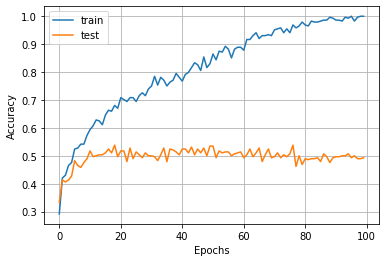

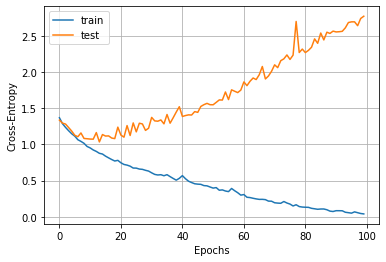

Iteration: 6
288/288 [==============================] - 0s 74us/sample - loss: 2.5960 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[38 21  7  6]
 [22 40 10  0]
 [14  2 34 22]
 [16  4 19 33]]
(0.5114837599667549, 0.5034722222222223, 0.5049473029387097, None)


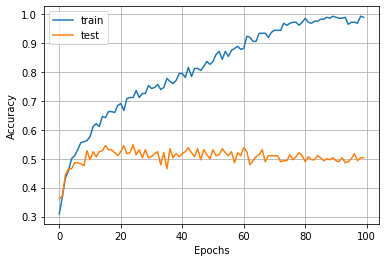

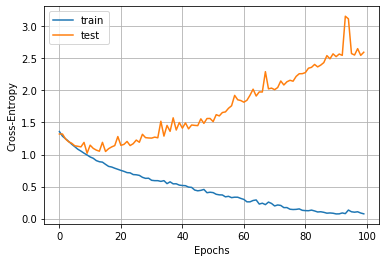

Iteration: 7
288/288 [==============================] - 0s 84us/sample - loss: 2.7174 - acc: 0.4965
kappa:  0.3287037037037037
confusion matrix:
 [[39 19  8  6]
 [20 39 11  2]
 [17  2 30 23]
 [16  4 17 35]]
(0.5045341320816864, 0.4965277777777778, 0.49779203834237834, None)


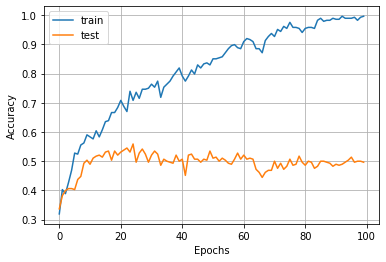

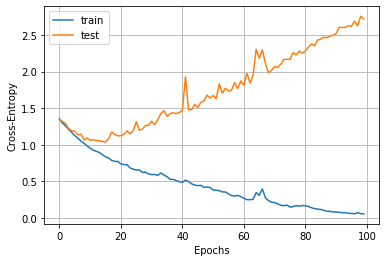

Iteration: 8
288/288 [==============================] - 0s 85us/sample - loss: 2.7341 - acc: 0.5000
kappa:  0.33333333333333337
confusion matrix:
 [[38 18 11  5]
 [23 38 11  0]
 [18  2 35 17]
 [14  3 22 33]]
(0.5186477362233275, 0.5, 0.5038239575862771, None)


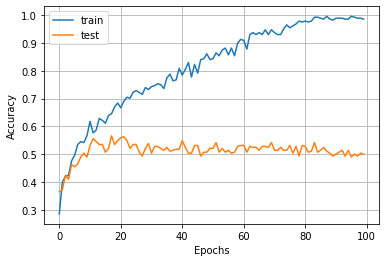

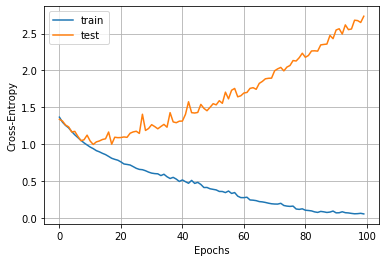

Iteration: 9
288/288 [==============================] - 0s 80us/sample - loss: 2.8972 - acc: 0.5243
kappa:  0.3657407407407407
confusion matrix:
 [[41 14 11  6]
 [23 39  8  2]
 [17  2 29 24]
 [13  2 15 42]]
(0.5370664417416937, 0.5243055555555556, 0.5258997904470525, None)


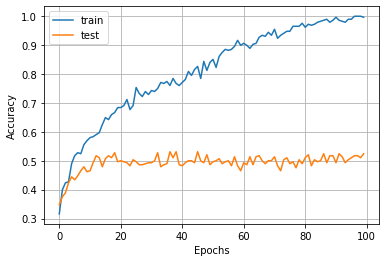

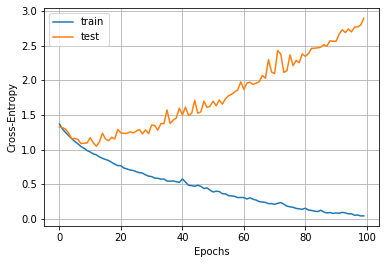

Iteration: 10
288/288 [==============================] - 0s 76us/sample - loss: 2.6678 - acc: 0.5243
kappa:  0.3657407407407407
confusion matrix:
 [[28 31  8  5]
 [ 8 54  9  1]
 [12  5 31 24]
 [11  4 19 38]]
(0.517638613217192, 0.5243055555555556, 0.5167459084984644, None)


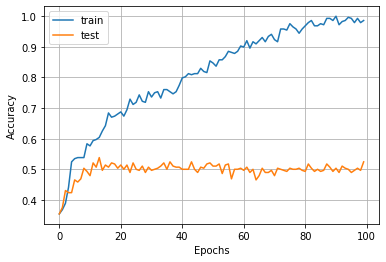

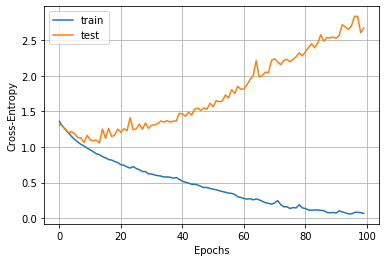


Resultados:
loss: [2.6299304962158203, 2.8088218635982938, 2.657965660095215, 2.7165005207061768, 2.7758290237850614, 2.5960471630096436, 2.7174382474687366, 2.734062751134237, 2.8971958425309925, 2.667784253756205]
accuracy: [0.49305555, 0.5034722, 0.4826389, 0.4965278, 0.49305555, 0.5034722, 0.4965278, 0.5, 0.5243056, 0.5243056]
kappa: [0.32407407407407407, 0.3379629629629629, 0.31018518518518523, 0.3287037037037037, 0.32407407407407407, 0.3379629629629629, 0.3287037037037037, 0.33333333333333337, 0.3657407407407407, 0.3657407407407407]
precision: [0.5005995047269527, 0.5074907096564897, 0.49855413737401316, 0.5088102219377836, 0.5080288175876411, 0.5114837599667549, 0.5045341320816864, 0.5186477362233275, 0.5370664417416937, 0.517638613217192]
recall: [0.4930555555555556, 0.5034722222222223, 0.48263888888888884, 0.49652777777777773, 0.4930555555555556, 0.5034722222222223, 0.4965277777777778, 0.5, 0.5243055555555556, 0.5243055555555556]
f1: [0.4946922005422727, 0.5043883161060884, 0

In [11]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(LSTM(128, input_shape=(3,22)))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [12]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128)               77312     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 77,828
Trainable params: 77,828
Non-trainable params: 0
_________________________________________________________________


In [13]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.5017
std: (+/- 0.0126)
kappa: 0.3356
precision: 0.5113
recall: 0.5017
f1: 0.5024
